In [26]:
# Carregando as bibliotecas necessárias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importar função train_test_split 
from sklearn import metrics # Importar scikit-learn metrics module para cálculo de acurácia
from sklearn import tree # Plotar a árvore de decisão
from matplotlib import pyplot as plt
import graphviz

In [27]:
# Realizando a leitura dos dados de vinho vermelho
data_red = pd.read_csv("winequality-red.csv", header = 0, sep = ';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
# Separando os dados
feature_cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
                'density','pH','sulphates','alcohol']
#feature_cols = ['fixed acidity']
X_red = data_red[feature_cols]
X_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [29]:
Y_red = data_red.quality
Y_red

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [30]:
# Dividindo o dataset em conjuntos para treinamento e teste
#70% para treinamento e 30% para teste
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y_red, test_size = 0.3, random_state = 1)

In [42]:
# Criando o objeto Decision Tree Classifier
tree_red = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_features = "log2", max_depth = 3)

# Treinando o Decision Tree Classifier
tree_red = tree_red.fit(X_train_red,Y_train_red)

# Predizendo a respota para o dataset
y_pred_red = tree_red.predict(X_test_red)

# Score do modelo 
tree_red.score(X_red,Y_red)

0.5572232645403377

In [43]:
indices_red = tree_red.feature_importances_
print(indices_red)

[0.         0.03197541 0.11174471 0.         0.14231551 0.
 0.15540663 0.         0.         0.06843805 0.49011969]


In [44]:
# Acurácia do modelo
print("Cirtério de Gini")
print("Acurácia (vinho vermelho):",metrics.accuracy_score(Y_test_red, y_pred_red))

Cirtério de Gini
Acurácia (vinho vermelho): 0.55


Número de folhas: 8


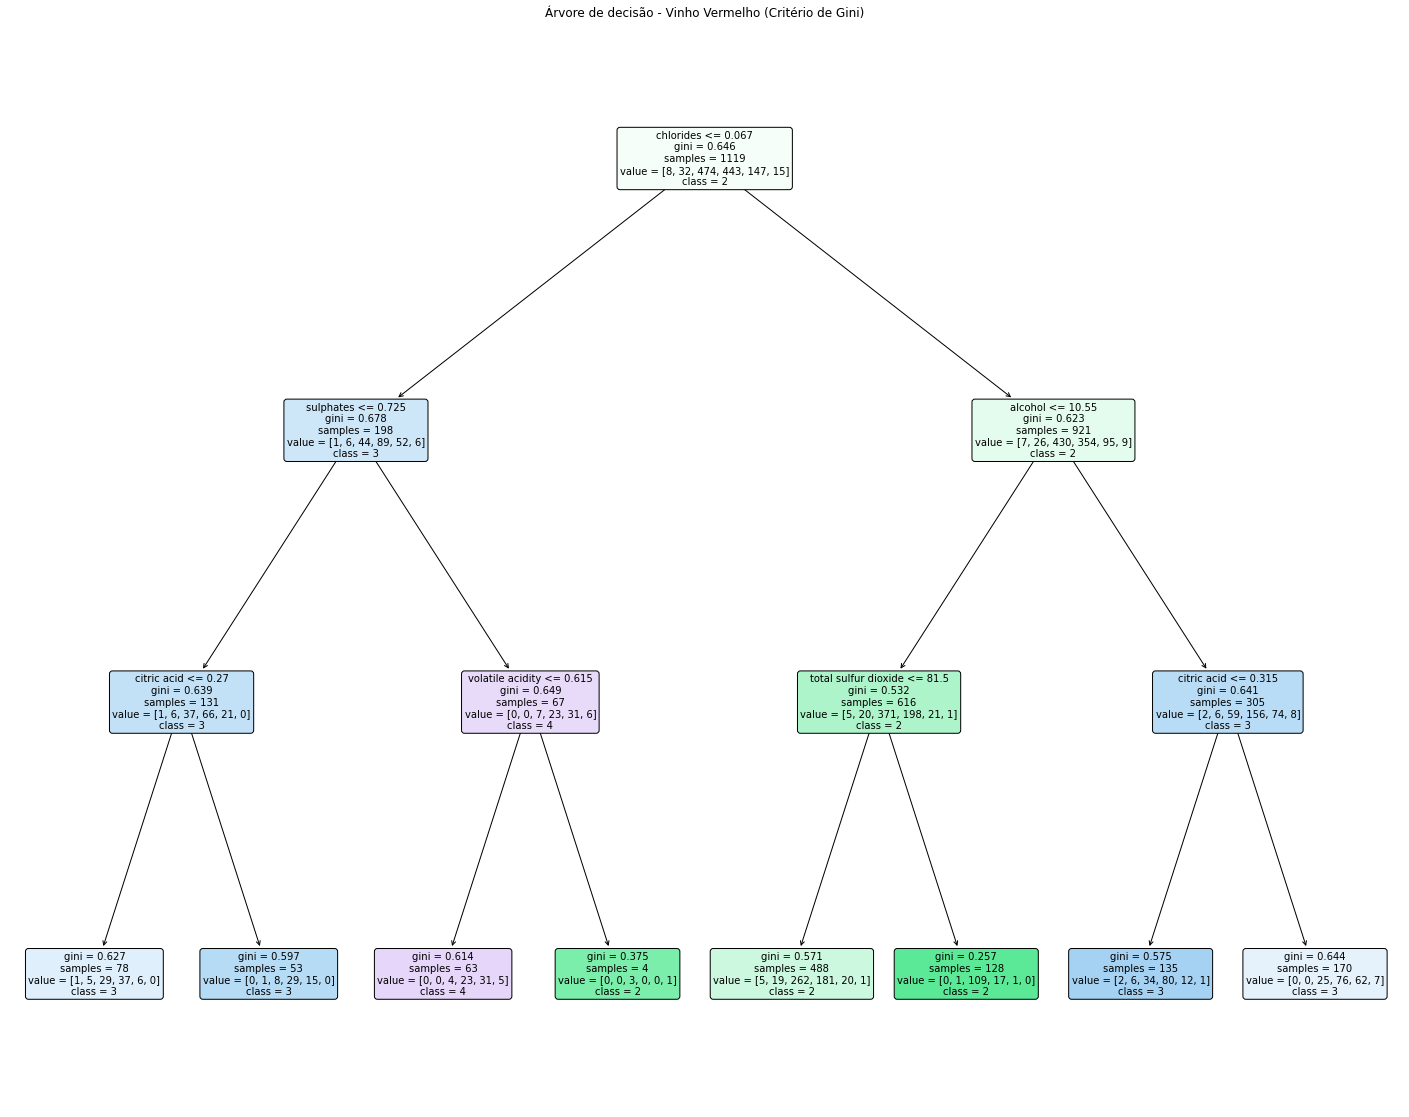

In [45]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", tree_red.get_n_leaves())
feature_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
tree.plot_tree(tree_red, filled = True, rounded=True, feature_names = feature_cols, class_names = feature_class)
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Gini)")
plt.show()
fig.savefig("decistion_tree_red_gini.png")

Número de folhas: 8


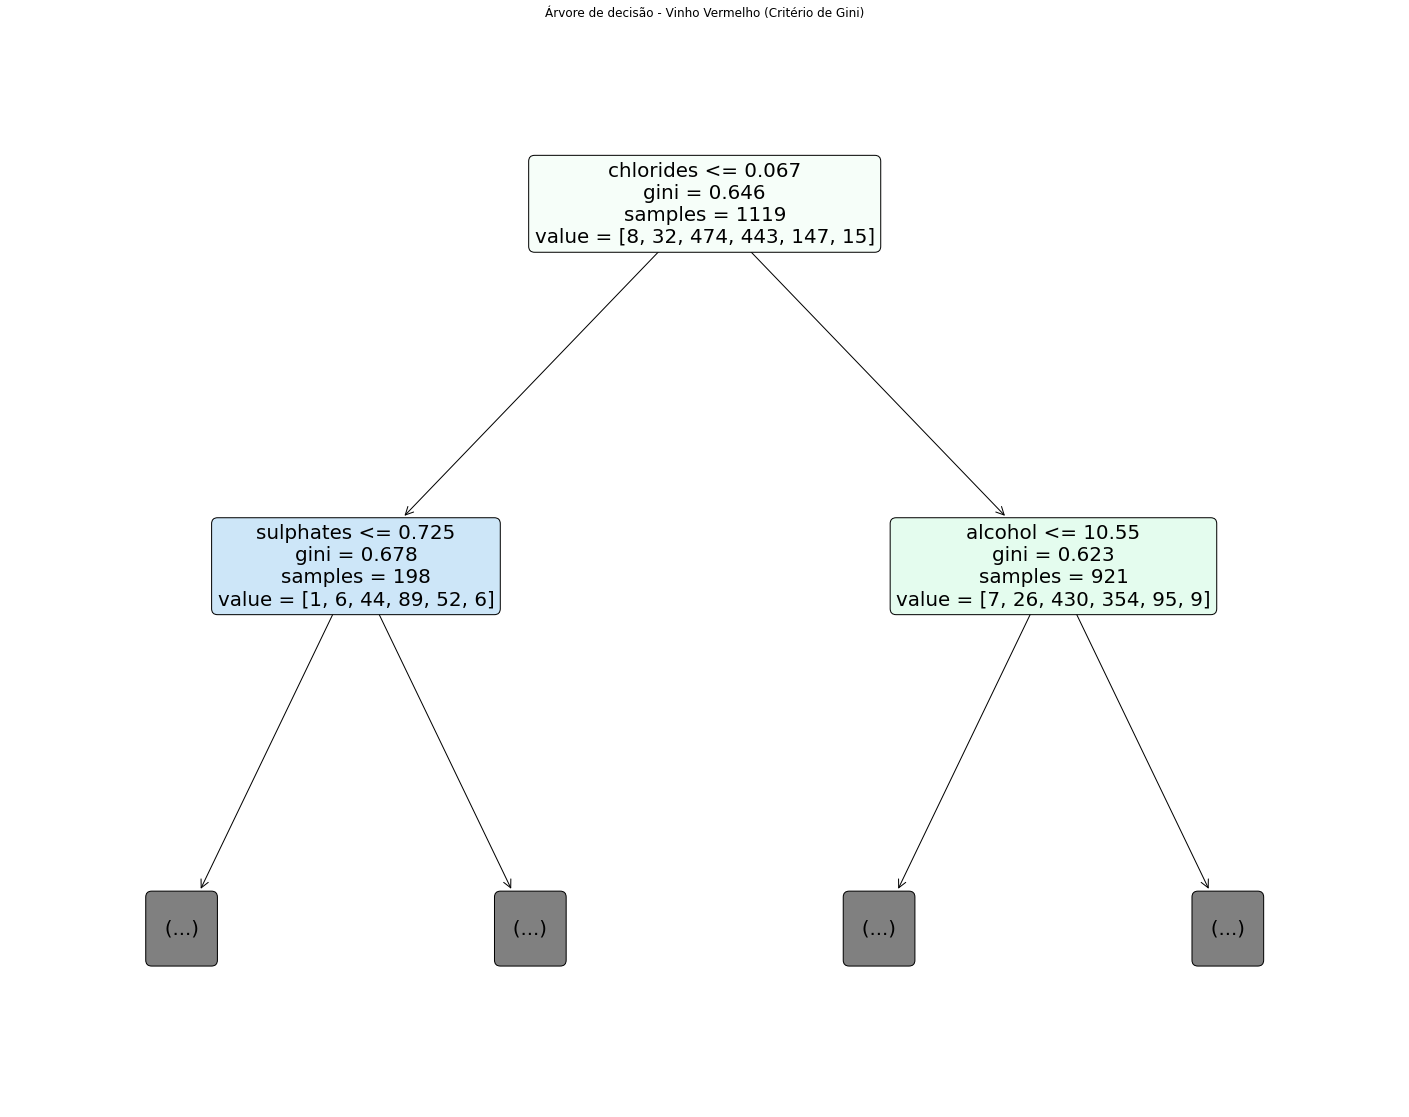

In [46]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", tree_red.get_n_leaves())
#feature_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
tree.plot_tree(tree_red, filled = True, rounded=True, max_depth = 1, feature_names = feature_cols) #, class_names = feature_class)
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Gini)")
plt.show()
fig.savefig("decistion_tree_red_gini_2.png")

In [47]:
tree_red.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test_red, y_pred_red))
print(classification_report(Y_test_red, y_pred_red))

[[  0   0   1   1   0   0]
 [  0   0  10  11   0   0]
 [  0   0 166  35   6   0]
 [  0   0  91  89  15   0]
 [  0   0   8  35   9   0]
 [  0   0   0   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.60      0.80      0.69       207
           6       0.51      0.46      0.48       195
           7       0.30      0.17      0.22        52
           8       0.00      0.00      0.00         3

    accuracy                           0.55       480
   macro avg       0.24      0.24      0.23       480
weighted avg       0.50      0.55      0.52       480



c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
# Criando o objeto Decision Tree Classifier
tree_red = DecisionTreeClassifier(criterion = "entropy", splitter = "best", max_features = "log2", max_depth = 3)

# Treinando o Decision Tree Classifier
tree_red = tree_red.fit(X_train_red,Y_train_red)

# Predizendo a respota para o dataset
y_pred_red = tree_red.predict(X_test_red)

# Score do modelo 
tree_red.score(X_red,Y_red)

0.5703564727954972

In [52]:
# Acurácia do modelo
print("Cirtério de Entropia")
print("Acurácia (vinho vermelho):",metrics.accuracy_score(Y_test_red, y_pred_red))

Cirtério de Entropia
Acurácia (vinho vermelho): 0.5895833333333333


Número de folhas: 8


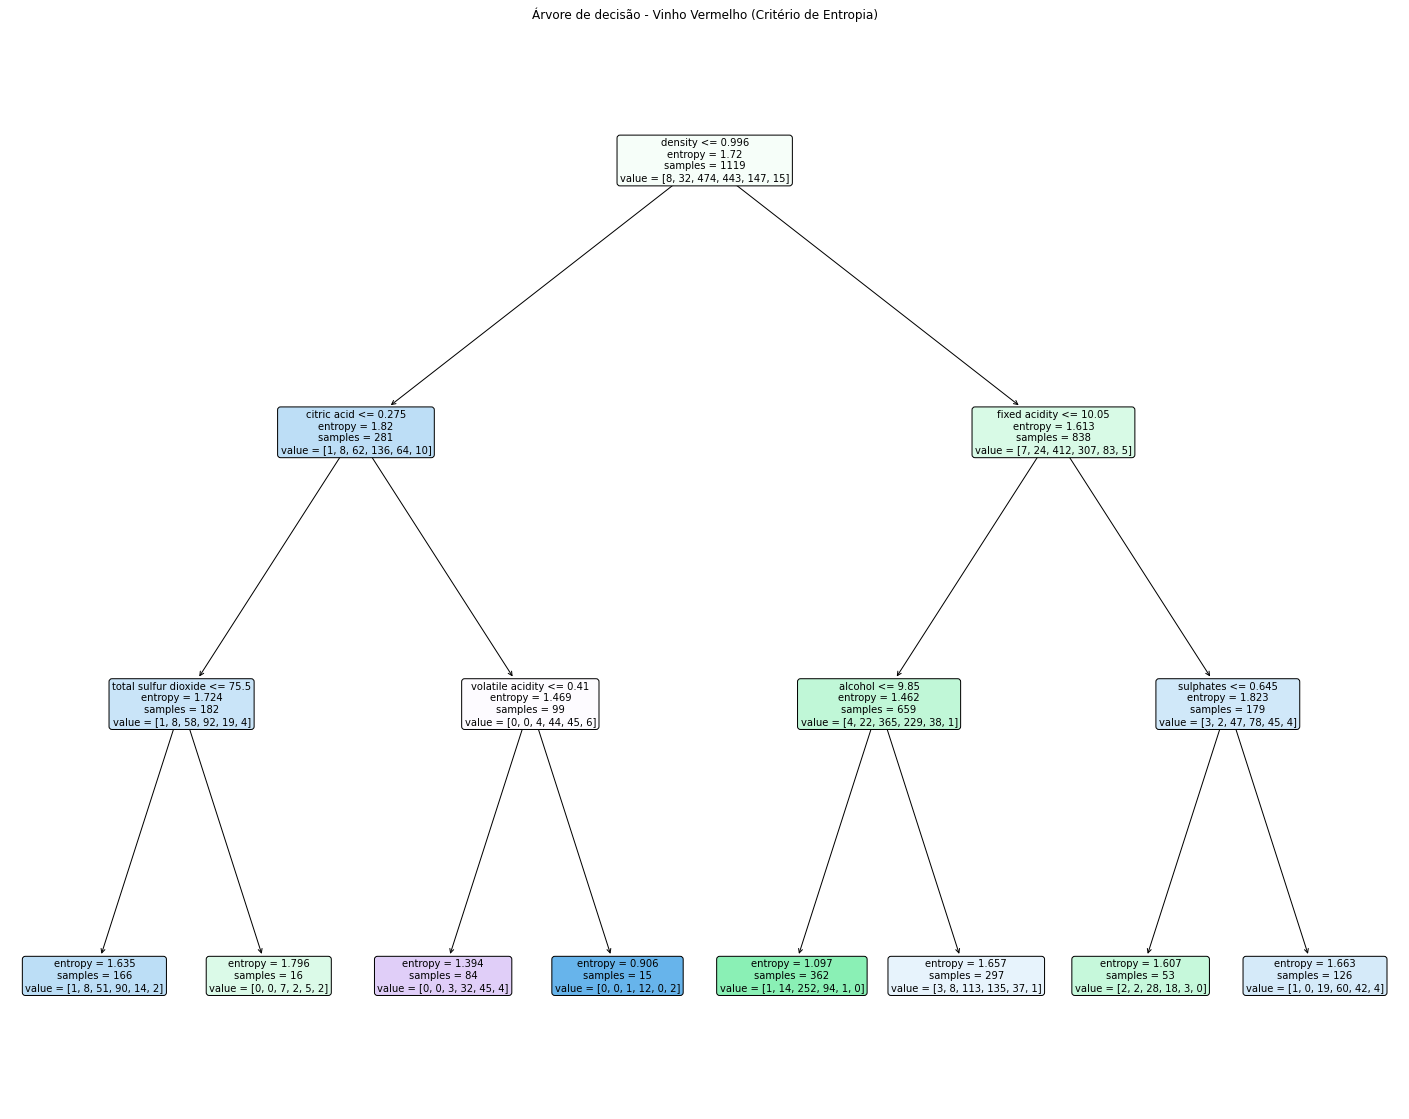

In [53]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", tree_red.get_n_leaves())
feature_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
tree.plot_tree(tree_red, filled = True, rounded=True, feature_names = feature_cols)#, class_names = feature_class)
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Entropia)")
plt.show()
fig.savefig("decistion_tree_red_entropy.png")

Número de folhas: 8


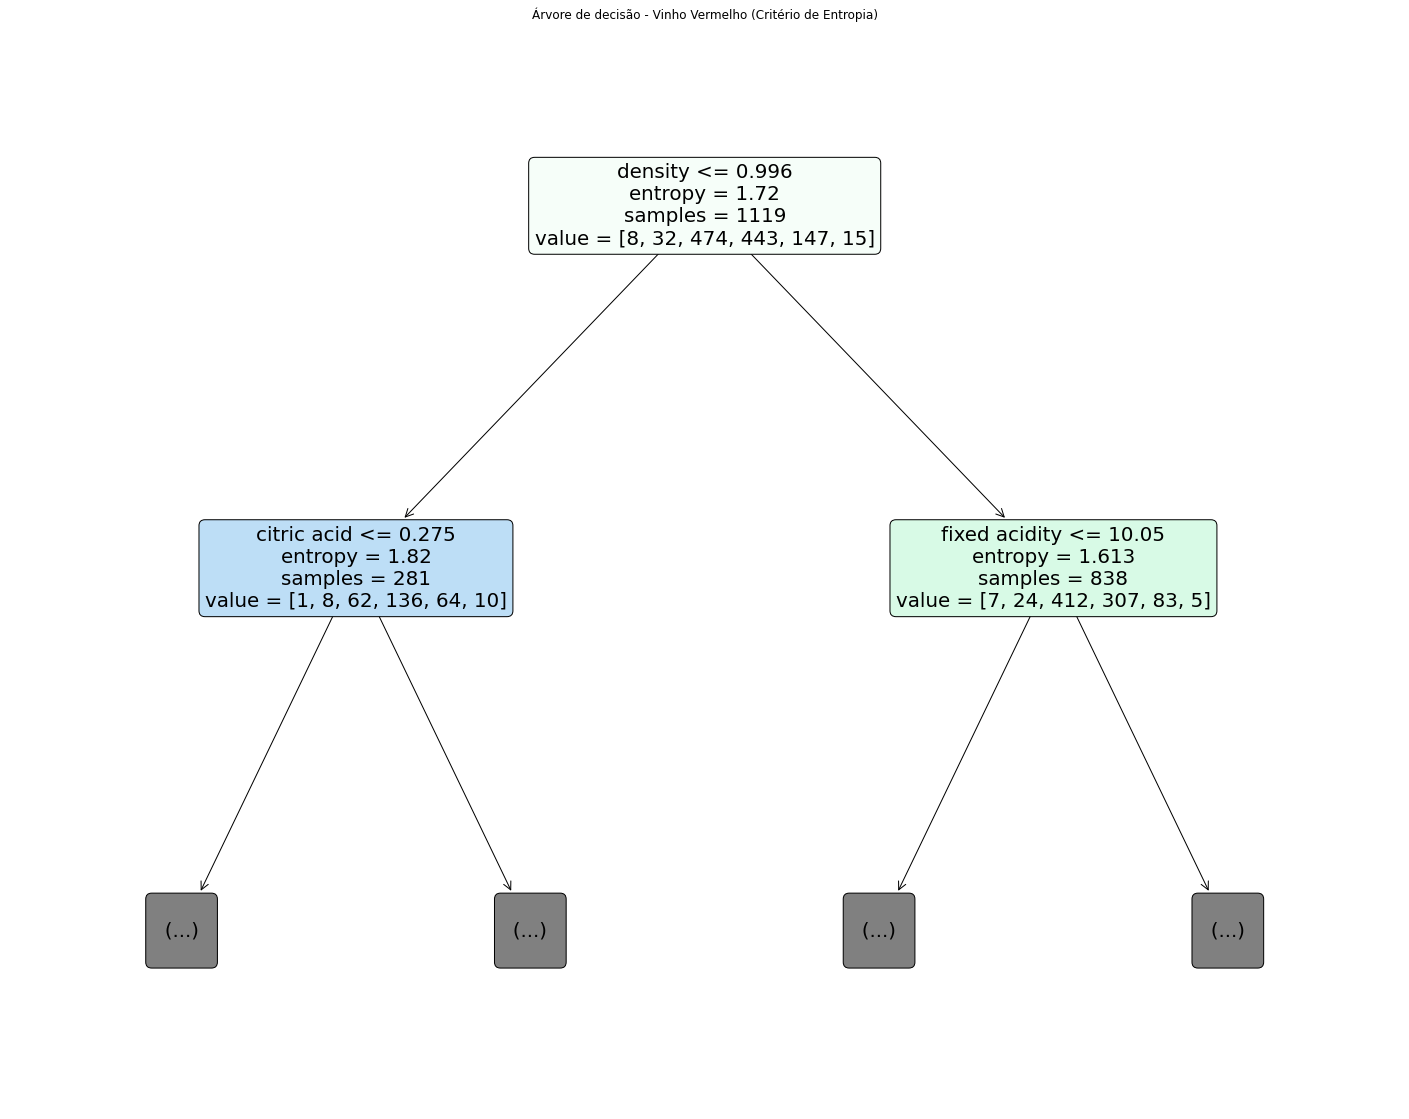

In [54]:
fig = plt.figure(figsize=(25,20))
print("Número de folhas:", tree_red.get_n_leaves())
#feature_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
tree.plot_tree(tree_red, filled = True, rounded=True, max_depth = 1, feature_names = feature_cols) #, class_names = feature_class)
plt.title("Árvore de decisão - Vinho Vermelho (Critério de Entropia)")
plt.show()
fig.savefig("decistion_tree_red_entropy_2.png")

In [55]:
tree_red.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test_red, y_pred_red))
print(classification_report(Y_test_red, y_pred_red))

[[  0   0   0   2   0   0]
 [  0   0   9  12   0   0]
 [  0   0 133  70   4   0]
 [  0   0  53 129  13   0]
 [  0   0   5  26  21   0]
 [  0   0   0   3   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.67      0.64      0.65       207
           6       0.53      0.66      0.59       195
           7       0.55      0.40      0.47        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.29      0.28      0.29       480
weighted avg       0.56      0.59      0.57       480



c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\lucas\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo